# Individual Project – Financial Dashboard

In [2]:
# Initiating

import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import yahoo_fin.stock_info as si
import streamlit as st
import numpy as np
import mplfinance as mpf

In [12]:
info = si.get_analysts_info('AAPL')

In [13]:
type(info)

dict

In [14]:
info1 = si.get_quote_table('AAPL', dict_result=False)

In [15]:
type(info1)

pandas.core.frame.DataFrame

In [18]:
info2 = si.get_stats('AAPL')

In [19]:
type(info2)

pandas.core.frame.DataFrame

In [172]:
info3 = si.get_data('AAPL', start_date = '1/1/2021', end_date = '11/11/2021', index_as_date = False, interval = "1d")

In [173]:
info3

,date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617096,143301900,AAPL
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207306,97664900,AAPL
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000,AAPL
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117844,109578200,AAPL
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240921,105158200,AAPL
...,...,...,...,...,...,...,...,...
212,2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600,AAPL
213,2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600,AAPL
214,2021-11-08,151.410004,151.570007,150.160004,150.440002,150.440002,55020900,AAPL
215,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900,AAPL


In [174]:
info3[['date','close']]

,date,close
0,2021-01-04,129.410004
1,2021-01-05,131.009995
2,2021-01-06,126.599998
3,2021-01-07,130.919998
4,2021-01-08,132.050003
...,...,...
212,2021-11-04,150.960007
213,2021-11-05,151.279999
214,2021-11-08,150.440002
215,2021-11-09,150.809998


In [175]:
print(info3.iloc[-1,1])
print(info3.iloc[0,1])

150.02000427246094
133.52000427246094


<ipython-input-161-10888cf781fc>:1: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [18631.0 18632.0 18633.0 18634.0 18635.0 18638.0 18639.0 18640.0 18641.0
 18642.0 18646.0 18647.0 18648.0 18649.0 18652.0 18653.0 18654.0 18655.0
 18656.0 18659.0 18660.0 18661.0 18662.0 18663.0 18666.0 18667.0 18668.0
 18669.0 18670.0 18674.0 18675.0 18676.0 18677.0 18680.0 18681.0 18682.0
 18683.0 18684.0 18687.0 18688.0 18689.0 18690.0 18691.0 18694.0 18695.0
 18696.0 18697.0 18698.0 18701.0 18702.0 18703.0 18704.0 18705.0 18708.0
 18709.0 18710.0 18711.0 18712.0 18715.0 18716.0 18717.0 18718.0 18722.0
 18723.0 18724.0 18725.0 18726.0 18729.0 18730.0 18731.0 18732.0 18733.0
 18736.0 18737.0 18738.0 18739.0 18740.0 18743.0 18744.0 18745.0 18746.0
 18747.0 18750.0 18751.0 18752.0 18753.0 18754.0 18757.0 18758.0 18759.0
 18760.0 18761.0 18764.0 18765.0 18766.0 18767.0 18768.0 18771.0 18772.0
 18773.0 18774.0 18775.0 18779.0 18780.0 18781.0 18782.0 18785.0 18786.

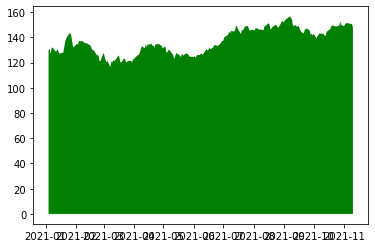

In [161]:
plot = plt.fill_between(info3['date'], info3['close'], where=info3.iloc[-1,1]-info3.iloc[0,1]>0,facecolor='green')
plot = plt.fill_between(info3['date'], info3['close'], where=info3.iloc[-1,1]-info3.iloc[0,1]<0,facecolor='red')

In [176]:
type(info3)

pandas.core.frame.DataFrame

In [177]:
info3.iloc[:,0]

0     2021-01-04
1     2021-01-05
2     2021-01-06
3     2021-01-07
4     2021-01-08
         ...    
212   2021-11-04
213   2021-11-05
214   2021-11-08
215   2021-11-09
216   2021-11-10
Name: date, Length: 217, dtype: datetime64[ns]

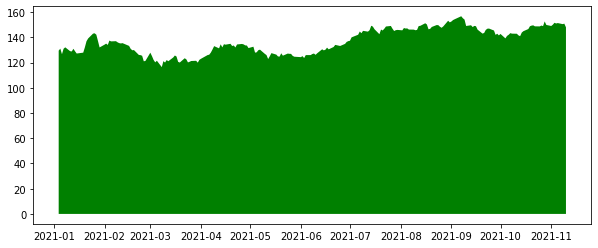

In [185]:
fig, ax = plt.subplots(figsize=(10, 4))
y = info3['close']
x = info3['date']
YTD = plt.fill_between(x,y,facecolor='green')

In [216]:
today = datetime.today().date()
today

datetime.date(2021, 11, 11)

In [217]:
m = today.month - 6
m

5

In [218]:
y = today.year
y

2021

In [219]:
d = today.day
d

11

In [223]:
date(y,m,d)

datetime.date(2021, 5, 11)

In [224]:
date(y,1,1)

datetime.date(2021, 1, 1)

In [226]:
m % 5 == 0

True

In [237]:
end_date1 = datetime.today().date()
y = end_date1.year
m = end_date1.month
d = end_date1.day - 10
start_date1 = date(y,m,d)

SP_data = si.get_data('AAPL', start_date = start_date1, end_date = datetime.today().date(), index_as_date = False, interval = "1d")

In [240]:
SP_data

,date,open,high,low,close,adjclose,volume,ticker
0,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.742920,74588300,AAPL
1,2021-11-02,148.660004,151.570007,148.649994,150.020004,149.801376,69122000,AAPL
2,2021-11-03,150.389999,151.970001,149.820007,151.490005,151.269241,54511500,AAPL
3,2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600,AAPL
4,2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600,AAPL
5,2021-11-08,151.410004,151.570007,150.160004,150.440002,150.440002,55020900,AAPL
6,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900,AAPL
7,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.919998,65076700,AAPL


In [241]:
SP_data.iloc[-1,4]

147.9199981689453

In [ ]:
def StockDailyVolatility(ticker, period):
  
    # Get the current date
    current_date = datetime.now().date()
    
    # Find the first date of the period
    begin_date = current_date - timedelta(days=period)
    
    # Get the stock price info
    stock_price = get_data(ticker, start_date=begin_date)
    
    # Calculate the volatility of the closing price
    daily_return = stock_price['close'].pct_change()
    daily_volatility = daily_return.std()
    return daily_volatility
    
    Run

print('Daily volatility:', np.round(StockDailyVolatility('aapl', 365) * 100, 2), "%")

In [284]:
a = si.get_data('AAPL', start_date = start_date1, end_date = datetime.now().date(), index_as_date = False, interval = "1d")
a

,date,open,high,low,close,adjclose,volume,ticker
0,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.742920,74588300,AAPL
1,2021-11-02,148.660004,151.570007,148.649994,150.020004,149.801376,69122000,AAPL
2,2021-11-03,150.389999,151.970001,149.820007,151.490005,151.269241,54511500,AAPL
3,2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600,AAPL
4,2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600,AAPL
5,2021-11-08,151.410004,151.570007,150.160004,150.440002,150.440002,55020900,AAPL
6,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.809998,56787900,AAPL
7,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.919998,65187100,AAPL
8,2021-11-11,148.960007,149.080002,147.681000,147.869995,147.869995,40264924,AAPL


In [300]:
d = a.iloc[:,0:7]
d.index = d['date']
d = d.iloc[:,6:7]
d

,volume
date,
2021-11-01,74588300
2021-11-02,69122000
2021-11-03,54511500
2021-11-04,60394600
2021-11-05,65414600
2021-11-08,55020900
2021-11-09,56787900
2021-11-10,65187100
2021-11-11,40264924


In [260]:
b = a.iloc[:,0:5]
b

,date,open,high,low,close
0,2021-11-01,148.990005,149.699997,147.800003,148.960007
1,2021-11-02,148.660004,151.570007,148.649994,150.020004
2,2021-11-03,150.389999,151.970001,149.820007,151.490005
3,2021-11-04,151.580002,152.429993,150.639999,150.960007
4,2021-11-05,151.889999,152.199997,150.059998,151.279999
5,2021-11-08,151.410004,151.570007,150.160004,150.440002
6,2021-11-09,150.199997,151.429993,150.059998,150.809998
7,2021-11-10,150.020004,150.130005,147.850006,147.919998
8,2021-11-11,148.960007,149.080002,147.681000,147.869995


In [263]:
c = np.transpose(b)
c

,0,1,2,3,4,5,6,7,8
date,2021-11-01 00:00:00,2021-11-02 00:00:00,2021-11-03 00:00:00,2021-11-04 00:00:00,2021-11-05 00:00:00,2021-11-08 00:00:00,2021-11-09 00:00:00,2021-11-10 00:00:00,2021-11-11 00:00:00
open,148.990005,148.660004,150.389999,151.580002,151.889999,151.410004,150.199997,150.020004,148.960007
high,149.699997,151.570007,151.970001,152.429993,152.199997,151.570007,151.429993,150.130005,149.080002
low,147.800003,148.649994,149.820007,150.639999,150.059998,150.160004,150.059998,147.850006,147.681
close,148.960007,150.020004,151.490005,150.960007,151.279999,150.440002,150.809998,147.919998,147.869995


In [266]:
c.columns = c.iloc[0]
c = c[1:]

In [267]:
c

date,2021-11-01,2021-11-02,2021-11-03,2021-11-04,2021-11-05,2021-11-08,2021-11-09,2021-11-10,2021-11-11
open,148.990005,148.660004,150.389999,151.580002,151.889999,151.410004,150.199997,150.020004,148.960007
high,149.699997,151.570007,151.970001,152.429993,152.199997,151.570007,151.429993,150.130005,149.080002
low,147.800003,148.649994,149.820007,150.639999,150.059998,150.160004,150.059998,147.850006,147.681
close,148.960007,150.020004,151.490005,150.960007,151.279999,150.440002,150.809998,147.919998,147.869995


Text(0.5, 1.0, 'Notched box plot')

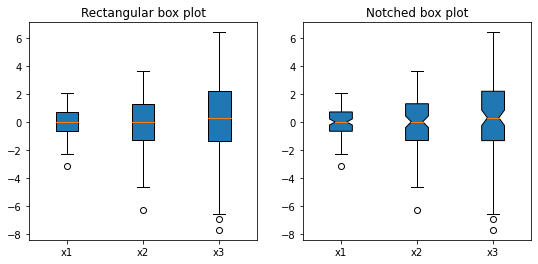

In [269]:
# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')



In [ ]:
# fill with colors
for bplot in (bplot1, bplot2):
    for patch in bplot['boxes']:
        if 
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [270]:
interval_dict = {"Day": "1d", "Week": "1wk", "Month": "1mo"}

interval_dict["Day"]

'1d'

In [309]:
graphdata = si.get_data('tsla', start_date = date(2021,1,1), end_date = date(2021,10,31), index_as_date = False, interval = '1d')
graphdata

,date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,TSLA
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,TSLA
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,TSLA
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,TSLA
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,TSLA
...,...,...,...,...,...,...,...,...
204,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,TSLA
205,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,TSLA
206,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,TSLA
207,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,TSLA


In [310]:
graphdata = graphdata.set_index('date')
graphdata

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,TSLA
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,TSLA
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,TSLA
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,TSLA
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,TSLA
...,...,...,...,...,...,...,...
2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,TSLA
2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,TSLA
2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,TSLA


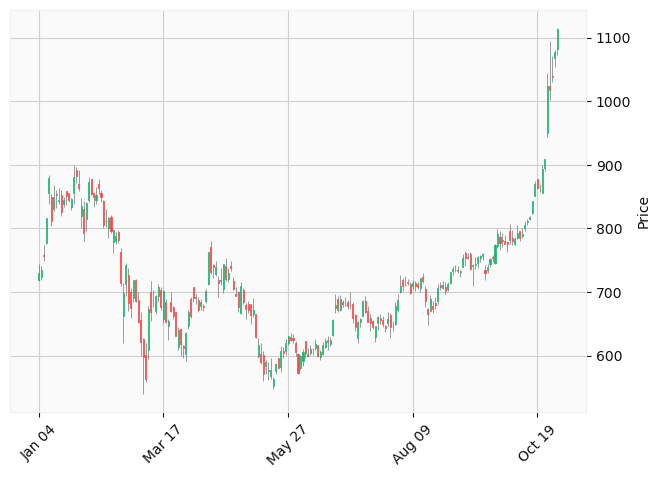

In [313]:
mpf.plot(graphdata, type='candle', style='yahoo')

In [314]:
x = graphdata['date']

KeyError: 'date'

In [317]:
analysis = si.get_analysts_info('tsla')
analysis

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2021)  Next Qtr. (Mar 2022)  \
 0   No. of Analysts                    22.00                 10.00   
 1     Avg. Estimate                     1.92                  1.77   
 2      Low Estimate                     1.39                  1.38   
 3     High Estimate                     2.61                  2.38   
 4      Year Ago EPS                     0.80                  0.93   
 
    Current Year (2021)  Next Year (2022)  
 0                30.00             29.00  
 1                 6.05              8.08  
 2                 4.11              4.93  
 3                 6.85             11.30  
 4                 2.24              6.05  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2021) Next Qtr. (Mar 2022)  \
 0          No. of Analysts                      19                    9   
 1            Avg. Estimate                  15.04B               15.45B   
 2             Low Estimate           

In [358]:
ana = analysis.keys()

analysis.iloc[0,0]

AttributeError: 'dict' object has no attribute 'iloc'

In [331]:
Earnings_Estimate = analysis['Earnings Estimate']
Earnings_Estimate = Earnings_Estimate.set_index('Earnings Estimate')
            
Revenue_Estimate = analysis['Revenue Estimate']
Revenue_Estimate = Revenue_Estimate.set_index('Revenue Estimate')

In [326]:
analysis.iloc[1,0]

AttributeError: 'dict' object has no attribute 'iloc'

In [335]:
z = si.get_stats_valuation('nflx')
z

,0,1
0,Market Cap (intraday) 5,291.28B
1,Enterprise Value 3,299.24B
2,Trailing P/E,59.29
3,Forward P/E 1,50.76
4,PEG Ratio (5 yr expected) 1,1.61
5,Price/Sales (ttm),10.46
6,Price/Book (mrq),19.02
7,Enterprise Value/Revenue 3,10.45
8,Enterprise Value/EBITDA 7,16.20


In [342]:
print(z.columns)

Int64Index([0, 1], dtype='int64')


In [343]:
print(z.keys())

Int64Index([0, 1], dtype='int64')


In [345]:
z.rename(columns={0: 'Valuation Measures',1:'USD'})

,Valuation Measures,USD
0,Market Cap (intraday) 5,291.28B
1,Enterprise Value 3,299.24B
2,Trailing P/E,59.29
3,Forward P/E 1,50.76
4,PEG Ratio (5 yr expected) 1,1.61
5,Price/Sales (ttm),10.46
6,Price/Book (mrq),19.02
7,Enterprise Value/Revenue 3,10.45
8,Enterprise Value/EBITDA 7,16.20


In [346]:
y = si.get_stats('nflx')
y

,Attribute,Value
0,Beta (5Y Monthly),0.81
1,52-Week Change 3,36.19%
2,S&P500 52-Week Change 3,29.68%
3,52 Week High 3,690.97
4,52 Week Low 3,475.84
5,50-Day Moving Average 3,639.75
6,200-Day Moving Average 3,554.84
7,Avg Vol (3 month) 3,3.84M
8,Avg Vol (10 day) 3,3.37M
9,Shares Outstanding 5,442.95M


In [347]:
y.iloc[0:6,]

,Attribute,Value
0,Beta (5Y Monthly),0.81
1,52-Week Change 3,36.19%
2,S&P500 52-Week Change 3,29.68%
3,52 Week High 3,690.97
4,52 Week Low 3,475.84
5,50-Day Moving Average 3,639.75


In [361]:
si.get_financials('aapl', yearly = True, quarterly = False)

{'yearly_income_statement': endDate                              2021-09-25    2020-09-26    2019-09-28  \
 Breakdown                                                                     
 researchDevelopment                 21914000000   18752000000   16217000000   
 effectOfAccountingCharges                  None          None          None   
 incomeBeforeTax                    109207000000   67091000000   65737000000   
 minorityInterest                           None          None          None   
 netIncome                           94680000000   57411000000   55256000000   
 sellingGeneralAdministrative        21973000000   19916000000   18245000000   
 grossProfit                        152836000000  104956000000   98392000000   
 ebit                               108949000000   66288000000   63930000000   
 operatingIncome                    108949000000   66288000000   63930000000   
 otherOperatingExpenses                     None          None          None   
 interestExpe

In [395]:
ref_sp = si.get_data('^GSPC', start_date = date(2021,1,1), end_date = date(2021,10,31), index_as_date = False, interval = '1d')
ref_sp = ref_sp.set_index('date')
ref_sp

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000,^GSPC
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000,^GSPC
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000,^GSPC
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000,^GSPC
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000,^GSPC
...,...,...,...,...,...,...,...
2021-10-25,4553.689941,4572.620117,4537.359863,4566.479980,4566.479980,3250210000,^GSPC
2021-10-26,4578.689941,4598.529785,4569.169922,4574.790039,4574.790039,2866500000,^GSPC
2021-10-27,4580.220215,4584.569824,4551.660156,4551.680176,4551.680176,3259510000,^GSPC


In [396]:
tsla = si.get_data('tsla', start_date = date(2021,1,1), end_date = date(2021,10,31), index_as_date = False, interval = '1d')
tsla = tsla.set_index('date')
tsla

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,TSLA
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,TSLA
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,TSLA
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,TSLA
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,TSLA
...,...,...,...,...,...,...,...
2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,TSLA
2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,TSLA
2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,TSLA


In [397]:
a = ref_sp.iloc[:,3:4]
a = a.rename(columns={'close':'S&P500'})
a

,S&P500
date,
2021-01-04,3700.649902
2021-01-05,3726.860107
2021-01-06,3748.139893
2021-01-07,3803.790039
2021-01-08,3824.679932
...,...
2021-10-25,4566.479980
2021-10-26,4574.790039
2021-10-27,4551.680176


In [398]:
b = tsla.iloc[:,3:4]
b = b.rename(columns={'close':'TSLA'})
b

,TSLA
date,
2021-01-04,729.770020
2021-01-05,735.109985
2021-01-06,755.979980
2021-01-07,816.039978
2021-01-08,880.020020
...,...
2021-10-25,1024.859985
2021-10-26,1018.429993
2021-10-27,1037.859985


In [399]:
result = pd.concat([a, b], axis=1).reindex(a.index)
result

,S&P500,TSLA
date,,
2021-01-04,3700.649902,729.770020
2021-01-05,3726.860107,735.109985
2021-01-06,3748.139893,755.979980
2021-01-07,3803.790039,816.039978
2021-01-08,3824.679932,880.020020
...,...,...
2021-10-25,4566.479980,1024.859985
2021-10-26,4574.790039,1018.429993
2021-10-27,4551.680176,1037.859985


In [412]:
a_change = (a.iloc[-1,:]-a.iloc[0,:])/a.iloc[0,:]*100
a_change

S&P500    24.447867
dtype: float64

In [401]:
b_change = (b.iloc[-1,:]-b.iloc[0,:])/b.iloc[0,:]*100
b_change

TSLA    52.650831
dtype: float64

In [407]:
z = a.iloc[-1,4:5]-a.iloc[-1,4:5]

In [413]:
type(a_change)

pandas.core.series.Series

In [4]:
ref_sp = si.get_data('^GSPC', start_date = date(2021,1,1), end_date = date(2021,10,31), index_as_date = False, interval = "1d")
ref_sp

,date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000,^GSPC
1,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000,^GSPC
2,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000,^GSPC
3,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000,^GSPC
4,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000,^GSPC
...,...,...,...,...,...,...,...,...
204,2021-10-25,4553.689941,4572.620117,4537.359863,4566.479980,4566.479980,3250210000,^GSPC
205,2021-10-26,4578.689941,4598.529785,4569.169922,4574.790039,4574.790039,2866500000,^GSPC
206,2021-10-27,4580.220215,4584.569824,4551.660156,4551.680176,4551.680176,3259510000,^GSPC
207,2021-10-28,4562.839844,4597.549805,4562.839844,4596.419922,4596.419922,3197560000,^GSPC


In [6]:
graphdata = si.get_data('TSLA', start_date = date(2021,1,1), index_as_date = False, interval = "1d")
graphdata

,date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,TSLA
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,TSLA
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,TSLA
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,TSLA
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,TSLA
...,...,...,...,...,...,...,...,...
214,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,1162.939941,33445700,TSLA
215,2021-11-09,1173.599976,1174.500000,1011.520020,1023.500000,1023.500000,59105800,TSLA
216,2021-11-10,1010.409973,1078.099976,987.309998,1067.949951,1067.949951,42802700,TSLA
217,2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600,TSLA


In [11]:
a = ref_sp.iloc[0,4]
b = graphdata.iloc[0,4]

c = a/b
c

5.070980998535363

In [13]:
d = ref_sp['close']/c
d

0      729.770020
1      734.938685
2      739.135069
3      750.109306
4      754.228804
          ...    
204    900.512146
205    902.150894
206    897.593617
207    906.416317
208    908.183226
Name: close, Length: 209, dtype: float64